In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Ising Model

エネルギー: $E = - J (S1 + S2 + S3 + S4)$

原子が上を向く確率:
$$
 P = \frac{1}{1 + \exp \left( \frac{2J(S1 + S2 + S3 + S4)}{T} \right)}
$$

$$\frac{Tc}{J} = \frac{2}{\log{(1 + \sqrt{2})}}$$

In [11]:
Tc = 2 / np.log(1 + np.sqrt(2))
Tc

2.2691853142130221

In [2]:
from isingmodel import Isingmodel

# temp > Tc となるようなデータを作成

$J = 1$で固定

In [39]:
temps = np.linspace(1.0, 3.5, 10)
temps  # 温度変化

array([ 2.3,  2.6,  2.9,  3.2,  3.5,  3.8,  4.1,  4.4,  4.7,  5. ])

In [40]:
n_iters =np.linspace(3, 15, 3)
n_iters = n_iters.astype(int)  # イテレーション回数
n_iters

array([ 3,  9, 15])

In [41]:
size=40 # 論文通り
n_samples=100

In [91]:
fg=True
for temp in temps:
    for n_iter in n_iters:
        ising = Isingmodel(size=size, n_samples=n_samples, n_iter=n_iter, temp=temp)
        if fg:
            X = ising.run_gibbs_sampling()
            fg=False
        else:
            X = pd.concat([X, ising.run_gibbs_sampling()], axis=0, ignore_index=True)
    print('temp = {:.2f}'.format(temp))
# ラベルを-1とする．
Data = pd.concat([X, pd.Series([-1]*X.shape[0])], axis=1)

temp = 2.30
temp = 2.60
temp = 2.90
temp = 3.20
temp = 3.50
temp = 3.80
temp = 4.10
temp = 4.40
temp = 4.70
temp = 5.00


In [94]:
Data = pd.concat([X, pd.Series([-1]*X.shape[0])], axis=1)
# csv形式にしてデータを保存
Data.to_csv('isingModel_data_-1.csv')

# temp < Tc となるようなデータを作成

$J = 1$で固定

In [95]:
temps = np.linspace(0, 2.2, 10)
temps  # 温度変化

array([ 0.        ,  0.24444444,  0.48888889,  0.73333333,  0.97777778,
        1.22222222,  1.46666667,  1.71111111,  1.95555556,  2.2       ])

In [104]:
fg=True
for temp in temps:
    for n_iter in n_iters:
        ising = Isingmodel(size=size, n_samples=n_samples, n_iter=n_iter, temp=temp)
        if fg:
            Y = ising.run_gibbs_sampling()
            fg=False
        else:
            Y = pd.concat([Y, ising.run_gibbs_sampling()], axis=0, ignore_index=True)
    print('temp = {:.2f}'.format(temp))
# ラベルを1とする．
Data = pd.concat([Y, pd.Series([1]*Y.shape[0], name='label')], axis=1)

temp = 0.00
temp = 0.24
temp = 0.49
temp = 0.73
temp = 0.98
temp = 1.22
temp = 1.47
temp = 1.71
temp = 1.96
temp = 2.20


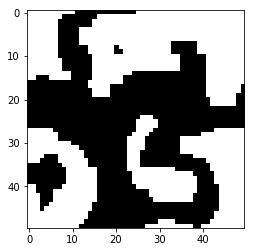

In [110]:
plt.imshow(Data.iloc[400, :-1].values.reshape(size, size), vmin=-1, vmax=1,
                         cmap=plt.cm.gray_r, interpolation='nearest')

In [122]:
Data = pd.concat([Y, pd.Series([1]*Y.shape[0], name='label')], axis=1)
# csv形式にして保存
Data.to_csv('isingModel_data_1.csv', index=False)

In [123]:
Data = pd.concat([X, pd.Series([0]*X.shape[0], name='label')], axis=1)
Data.to_csv('isingModel_data_0.csv', index=False)

# temp=1.0~3.5まで変化させたデータを作成しあとで$Tc>temp, Tc< temp$をラベルづけ

In [4]:
temps = np.linspace(1.0, 3.5, 41)
temps #温度変化

array([ 1.    ,  1.0625,  1.125 ,  1.1875,  1.25  ,  1.3125,  1.375 ,
        1.4375,  1.5   ,  1.5625,  1.625 ,  1.6875,  1.75  ,  1.8125,
        1.875 ,  1.9375,  2.    ,  2.0625,  2.125 ,  2.1875,  2.25  ,
        2.3125,  2.375 ,  2.4375,  2.5   ,  2.5625,  2.625 ,  2.6875,
        2.75  ,  2.8125,  2.875 ,  2.9375,  3.    ,  3.0625,  3.125 ,
        3.1875,  3.25  ,  3.3125,  3.375 ,  3.4375,  3.5   ])

In [5]:
# イテレーション回数は100で固定してみる
n_iter=100

In [6]:
size=40 # 論文通り
n_samples=100 # 1つの温度に対して100個のデータを作る

In [7]:
fg=True
for temp in temps:
    ising = Isingmodel(size=size, n_samples=n_samples, n_iter=n_iter, temp=temp)
    if fg:
        X = ising.run_gibbs_sampling()
        fg=False
    else:
        X = pd.concat([X, ising.run_gibbs_sampling()], axis=0, ignore_index=True)
    print('temp = {:.2f}'.format(temp))

temp = 1.00


KeyboardInterrupt: 